#**Logistic regression** 
Logistic regression is a classification algorithm.It is used to predict a binary outcome based on a set of independent variables.\
Ok,so what does this mean?A binary outcome is one where there are only two possible scenarios-ether the event happens(1)or it does not
happen(0)Independent variables are those variables or factors which may influence the outcome(or dependent variable)
So:Logistic regression is the comect type of analysis to use when you're working with binary data.You know you're dealing with binary data
when the output or dependent variable is dichotomous or categorical in nature;in other words,if it fits into one of two categories(such as"yes"
or"he","pass"or"fail,and so on).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [2]:
df = pd.read_csv('/content/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
#Dropping unnecessary columns 
df.drop('PassengerId' , axis=1 ,inplace=True)
df.drop('Name' , axis=1 ,inplace=True)
df.drop('Ticket' , axis=1 ,inplace=True)


In [5]:
#Median of Age column
print("Median of Age column is : " , df['Age'].median(skipna=True))
#Percentage of missing values on Cabin column
print('the percent of missing values is : ' , (df['Cabin'].isna().sum()/df.shape[0])*100)
#Most common boarding port of Embarkation
print('Most common boarding port of Embarkation is : ' , df['Embarked'].value_counts().idxmax()) 
'''
or import statistics
statistics.mode(df['Embarked'])
'''  

Median of Age column is :  28.0
the percent of missing values is :  77.10437710437711
Most common boarding port of Embarkation is :  S


"\nor import statistics\nstatistics.mode(df['Embarked'])\n"

In [6]:
#Filling the Missing values of Age by its Median
df['Age'].fillna(df['Age'].median(skipna=True), inplace=True)
#Filling the missing values by the most common boarding port of Embarkation 
df['Embarked'].fillna(df['Embarked'].value_counts().idxmax(), inplace=True)
#Dropping the Cabin column 
df.drop('Cabin' , axis=1 , inplace=True)

In [7]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [8]:
#Creating variable TravelAlone
df['TravelAlone'] = np.where((df['SibSp'] + df['Parch'])>0 , 0 , 1)
df.drop('SibSp',axis=1,inplace=True)
df.drop('Parch',axis=1,inplace=True)

In [9]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,TravelAlone
0,0,3,male,22.0,7.2500,S,0
1,1,1,female,38.0,71.2833,C,0
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,0
4,0,3,male,35.0,8.0500,S,1


In [10]:
#Import label encoder to transform the categorical varbiables into numerical varabiales
from sklearn import preprocessing

#label encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
#Encode labels in column Sex and Embarked
df['Sex']=label_encoder.fit_transform(df['Sex'])
df['Embarked']=label_encoder.fit_transform(df['Embarked'])

In [11]:
df['Sex'] , df['Embarked']

(0      1
 1      0
 2      0
 3      0
 4      1
       ..
 886    1
 887    0
 888    0
 889    1
 890    1
 Name: Sex, Length: 891, dtype: int64, 0      2
 1      0
 2      2
 3      2
 4      2
       ..
 886    2
 887    2
 888    2
 889    0
 890    1
 Name: Embarked, Length: 891, dtype: int64)

In [12]:
#setting the value for dependent and independent variables
X=df.drop('Survived',1)
y=df.Survived


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [13]:
#splitting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=2)

In [14]:
#Fitting the Logistic Regression model
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train , ytrain)

LogisticRegression()

In [15]:
#Predection of test set
y_pred = lr_model.predict(X_test)
#Predection values
y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1])

In [16]:
#Actual values and the predicted values
a = pd.DataFrame({'Actual Value': ytest , 'Predicted Value':y_pred})
a

,Actual Value,Predicted Value
707,1,0
37,0,0
615,1,1
169,0,0
68,1,1
...,...,...
89,0,0
80,0,0
846,0,0
870,0,0


In [17]:
#get confusion matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix
confusion = metrics.confusion_matrix(y_pred , ytest)
confusion

array([[87, 27],
       [13, 52]])

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       100
           1       0.80      0.66      0.72        79

    accuracy                           0.78       179
   macro avg       0.78      0.76      0.77       179
weighted avg       0.78      0.78      0.77       179



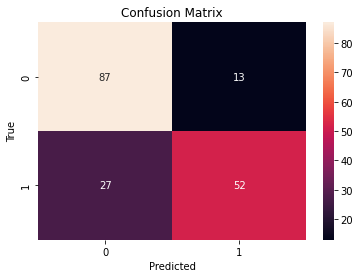

In [18]:
from sklearn.metrics import classification_report 
matrix = confusion_matrix(ytest , y_pred)
sns.heatmap(matrix , annot=True , fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(ytest , y_pred))